In [1]:
import matplotlib.pyplot as plt

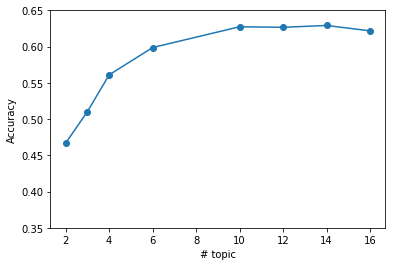

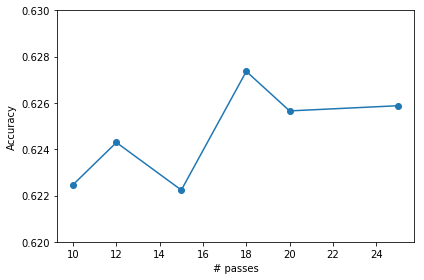

In [16]:
passes = [10,12,15,18,20,25]
accuracy = [0.6224690924469087, 0.6242917663119418, 0.6222366211534038, 0.6273658282037141, 0.6256569168865663, 0.6258802327680654]

topic = [2,3,4,6,10,12,14,16]
acc2 = [0.46685181933518155, 0.5102868547375918, 0.5610175317978687, 0.5987026123343333, 0.6273658282037141, 0.6266362640379275, 0.6291514055857411, 0.6217222165890526]

plt.figure()
# plt.subplot(1,2,1)
plt.plot(topic, acc2, '-o')
plt.ylim(bottom=0.35, top=0.65)
plt.xlabel('# topic')
plt.ylabel('Accuracy')

# plt.subplot(1,2,2)
plt.figure()
plt.plot(passes, accuracy, '-o')
plt.ylim(bottom=0.620, top=0.63)
plt.xlabel('# passes')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [17]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import csv
import numpy as np
import pickle
import lda

In [69]:
train_data = np.load('train_data_shuffle.npy')
train_label = np.load('train_label_shuffle.npy')
val_data = np.load('val_data_shuffle.npy')
val_label = np.load('val_label_shuffle.npy')

In [46]:
# turn our tokenized documents into a idterm dictionary
dictionary = corpora.Dictionary(train_data)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in train_data]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(13169 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(20474 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(26272 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(31503 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(36113 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(40241 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #70000 to Dictionary(4

INFO:gensim.corpora.dictionary:adding document #580000 to Dictionary(151296 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #590000 to Dictionary(152748 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #600000 to Dictionary(154306 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #610000 to Dictionary(155797 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #620000 to Dictionary(157249 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #630000 to Dictionary(158711 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)
INFO:gensim.corpora.dictionary:adding document #640000 to Dictionary(160154 unique tokens: ['guid', 'india?', 'invest', 'market', 'share']...)

In [47]:
row = []
col = []
data = []
for i in range(len(corpus)):
    for j in range(len(corpus[i])):
        row.append(i)
        col.append(corpus[i][j][0])
        data.append(corpus[i][j][1])

In [48]:
len(dictionary)

161169

In [49]:
# from scipy.sparse import csr_matrix
# csr = csr_matrix((data, (row, col)), shape=(len(corpus), 161169))

In [202]:
model = lda.LDA(n_topics=18, random_state=0, n_iter=500)
model.fit(csr)

INFO:lda:n_documents: 646962
INFO:lda:vocab_size: 161169
INFO:lda:n_words: 3739351
INFO:lda:n_topics: 18
INFO:lda:n_iter: 500
/Users/apple/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -47953146
INFO:lda:<10> log likelihood: -38098152
INFO:lda:<20> log likelihood: -35051860
INFO:lda:<30> log likelihood: -34039839
INFO:lda:<40> log likelihood: -33627246
INFO:lda:<50> log likelihood: -33396547
INFO:lda:<60> log likelihood: -33247104
INFO:lda:<70> log likelihood: -33155262
INFO:lda:<80> log likelihood: -33089738
INFO:lda:<90> log likelihood: -33038926
INFO:lda:<100> log likelihood: -33004966
INFO:lda:<110> log likelihood: -32973141
INFO:lda:<120> log likelihood: -32953375
INFO:lda:<130> log likelihood: -32939382
INFO:lda:

In [95]:
# model.transform(csr)

/Users/apple/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


array([[0.00420689, 0.95093737, 0.02252504, 0.00520717, 0.01712353],
       [0.00602705, 0.94366221, 0.02822836, 0.00761385, 0.01446853],
       [0.25238149, 0.01059254, 0.00138202, 0.01551256, 0.72013139],
       ...,
       [0.67060694, 0.01712695, 0.01004794, 0.29904942, 0.00316875],
       [0.00170571, 0.00354284, 0.00305453, 0.98460506, 0.00709186],
       [0.00170571, 0.00354284, 0.00305453, 0.98460506, 0.00709186]])

In [70]:
# # # turn our tokenized documents into a idterm dictionary
# val_dictionary = corpora.Dictionary(val_data)

# convert tokenized documents into a document-term matrix
val_corpus = [dictionary.doc2bow(text) for text in val_data]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(12877 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(20209 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(26154 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(31268 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(35863 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(40071 unique tokens: ['can', 'it?', 'lonely?', 'mental', 'solv']...)
INFO:gensim.corpora.dictionary:adding document #70000 to Dictionary(43925 unique tokens: ['ca

In [78]:
val_row = []
val_col = []
val_data_ = []
for i in range(len(val_corpus)):
    for j in range(len(val_corpus[i])):
        val_row.append(i)
        val_col.append(val_corpus[i][j][0])
        val_data_.append(val_corpus[i][j][1])
        
val_csr = csr_matrix((val_data_, (val_row, val_col)), shape=(len(val_corpus), len(dictionary)))

In [203]:
doc_topic = model.transform(val_csr)

/Users/apple/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


In [204]:
p1 = [doc_topic[i] for i in range(0,len(doc_topic),2)]
p2 = [doc_topic[i] for i in range(1,len(doc_topic),2)]

In [205]:
mu_info = []
for i in range(len(p1)):
    mu_info.append(scipy.stats.entropy(p1[i],p2[i]) + scipy.stats.entropy(p2[i],p1[i]))

/Users/apple/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2514: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=0)
/Users/apple/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2507: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


In [221]:
import scipy

val_duplicate = []
for m in mu_info:
    if m >= 6.5:
        val_duplicate.append('0')
    else:
        val_duplicate.append('1')
val_duplicate = np.array(val_duplicate).astype('int')
val_label = val_label.astype('int')

import sklearn
print(sklearn.metrics.accuracy_score(val_label, val_duplicate))
print(sklearn.metrics.precision_score(val_label, val_duplicate))
print(sklearn.metrics.recall_score(val_label, val_duplicate))
print(sklearn.metrics.f1_score(val_label, val_duplicate))
print(np.sum(np.subtract(1, val_duplicate)))

0.46044268579201186
0.4055097625763343
0.9927594529364441
0.575817082417903
7836


In [222]:
np.save('val_duplicate_t18.npy', val_duplicate)

In [223]:
model.topic_word_

array([[2.48281764e-05, 7.09321584e-03, 4.13114416e-08, ...,
        4.13114416e-08, 4.13114416e-08, 4.13114416e-08],
       [4.51496438e-08, 4.51496438e-08, 4.51496438e-08, ...,
        4.51496438e-08, 4.51496438e-08, 4.51496438e-08],
       [2.05471389e-04, 4.89101139e-08, 4.89101139e-08, ...,
        4.89101139e-08, 4.89101139e-08, 4.89101139e-08],
       ...,
       [4.49216743e-08, 4.49216743e-08, 4.49216743e-08, ...,
        4.49216743e-08, 4.49216743e-08, 4.49216743e-08],
       [5.25721752e-08, 5.25721752e-08, 1.31961417e-03, ...,
        5.25721752e-08, 5.25721752e-08, 5.25721752e-08],
       [4.73761456e-08, 4.73761456e-08, 4.73761456e-08, ...,
        4.73761456e-08, 4.73761456e-08, 4.73761456e-08]])

In [224]:
dictionary